In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [108]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Dataset downloaded to:", path)

Dataset downloaded to: C:\Users\nurka\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\434


In [109]:
df = pd.read_csv(path + '/GlobalWeatherRepository.csv')

df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [110]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [111]:
selected = ['temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'uv_index']

training = df[selected]

training.head(5)

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,uv_index
0,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,30,7.0
1,19.0,Partly cloudy,11.2,320,29.88,0.00,94,75,5.0
2,23.0,Sunny,15.1,280,29.85,0.00,29,0,5.0
3,6.3,Light drizzle,11.9,215,29.75,0.01,61,100,2.0
4,26.0,Partly cloudy,13.0,150,29.85,0.00,89,50,8.0


In [112]:
x_feat = [col for col in training.columns if col != 'condition_text']

X = training[x_feat]
y = training['condition_text']

In [113]:
y = y.str.lower()

y.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet', 'blizzard',
       'moderate snow', 'light snow', 'light sleet showers',
       'light freezing rain', 'heavy snow', 'blowing snow',
       'patchy heavy snow', 'light snow showers',
       'moderate or heavy sleet', 'patchy light snow'], dtype=object)

In [114]:
import requests

response = requests.get("https://www.weatherapi.com/docs/weather_conditions.json")

label = pd.DataFrame(response.json())

In [115]:
label_select_dict = {}

for index, row in label.iterrows():
    label_select_dict[row['night'].lower()] = row['code']
    label_select_dict[row['day'].lower()] = row['code']

y_encode = y.map(label_select_dict)

In [116]:
y_encode = y_encode.dropna()

In [117]:
X = X.loc[y_encode.index]

In [118]:
weather_mapping = {
    'Clear': [1000],
    'Cloudy': [1003, 1006, 1009],
    'Drizzle': [1150, 1153, 1168, 1171, 1180],
    'Rain': [1063, 1183, 1186, 1189, 1192, 1195, 1240, 1243, 1246, 1198, 1201], 
    'Storm/Thunder': [1087, 1273, 1276, 1279, 1282],
    'Snow': [1066, 1210, 1213, 1216, 1219, 1222, 1225, 1255, 1258, 1261, 1264,],
    'Sleet': [1069, 1072, 1204, 1207, 1249, 1252],
    'Fog': [1030, 1135, 1147],
    'Extreme Weather': [1114, 1117, 1237]
}

flat_mapping = {code: category for category, codes in weather_mapping.items() for code in codes}

y_encode_transform = y_encode.map(flat_mapping)

In [119]:
label_counts = pd.DataFrame(y_encode_transform).value_counts()
print(label_counts)

condition_text 
Cloudy             17542
Clear              14128
Rain                2746
Fog                 1314
Storm/Thunder        625
Drizzle              413
Snow                  84
Sleet                 15
Extreme Weather        5
Name: count, dtype: int64


In [120]:
encode_label = {
    'Clear': 0,
    'Cloudy': 1,
    'Drizzle': 2,
    'Rain': 3,
    'Storm/Thunder': 4,
    'Snow': 5,
    'Sleet': 6,
    'Fog': 7,
    'Extreme Weather': 8
}

y_encoded = y_encode_transform.map(encode_label)

In [121]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y_encode_transform)

In [123]:
# import pickle

# scaler_path = 'label_encoder.pkl'
# with open(scaler_path, 'wb') as f:
#     pickle.dump(encoder, f)

# print(f"Scaler saved as {scaler_path}")

In [125]:
# encoder.classes_

In [126]:
X.iloc[0]

temperature_celsius     26.60
wind_kph                13.30
wind_degree            338.00
pressure_in             29.89
precip_in                0.00
humidity                24.00
cloud                   30.00
uv_index                 7.00
Name: 0, dtype: float64

In [127]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=4, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

pd.DataFrame(y_resampled).value_counts()

condition_text
0                 17542
1                 17542
2                 17542
3                 17542
4                 17542
5                 17542
6                 17542
7                 17542
8                 17542
Name: count, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((126302, 8), (31576, 8), (126302,), (31576,))

In [141]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [142]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [143]:
scaler = tf.keras.layers.Normalization(axis=-1)
scaler.adapt(np.array(x_train))

In [144]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    scaler,
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'),    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [145]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 9)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,602 (25.79 KB)

 Trainable params: 6,265 (24.47 KB)

 Non-trainable params: 337 (1.32 KB)

In [146]:
from tensorflow.keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['accuracy'] >= 0.890 and logs['val_accuracy'] >= 0.885:
            self.model.stop_training = True

custom_early_stopping = CustomEarlyStopping()

In [147]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), verbose=1, callbacks=[custom_early_stopping])

Epoch 1/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6540 - loss: 1.0511 - val_accuracy: 0.7670 - val_loss: 0.6426
Epoch 2/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7659 - loss: 0.6428 - val_accuracy: 0.7559 - val_loss: 0.6451
Epoch 3/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7835 - loss: 0.5849 - val_accuracy: 0.8070 - val_loss: 0.5218
Epoch 4/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7965 - loss: 0.5482 - val_accuracy: 0.8126 - val_loss: 0.5107
Epoch 5/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8045 - loss: 0.5272 - val_accuracy: 0.8211 - val_loss: 0.4837
Epoch 6/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8079 - loss: 0.5165 - val_accuracy: 0.8247 - val_loss: 0.4808
Epoch 7/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8131 - loss: 0.5090 - val_accuracy: 0.8342 - val_loss: 0.4611
Epoch 8/100
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8200 - loss: 

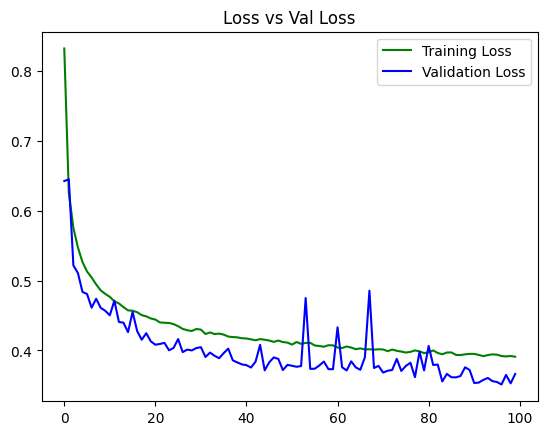

In [148]:
plt.plot(history.history['loss'], color='g', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title("Loss vs Val Loss")
plt.legend()
plt.show()

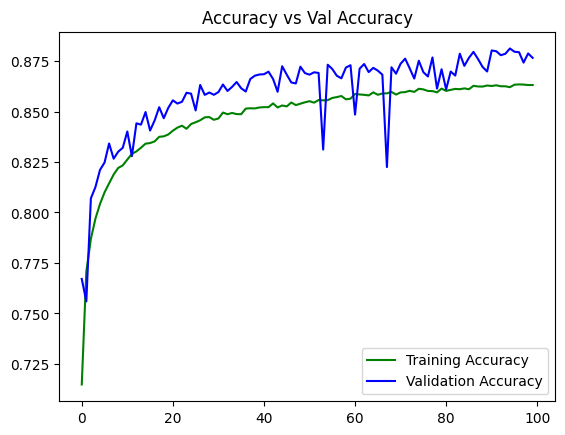

In [149]:
plt.plot(history.history['accuracy'], color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.legend()
plt.show()

In [150]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

987/987 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3454
           1       0.75      0.68      0.72      3432
           2       0.82      0.92      0.87      3476
           3       0.75      0.66      0.71      3552
           4       0.78      0.85      0.81      3449
           5       0.99      1.00      0.99      3564
           6       0.99      1.00      1.00      3517
           7       0.83      0.86      0.84      3586
           8       1.00      1.00      1.00      3546

    accuracy                           0.88     31576
   macro avg       0.88      0.88      0.87     31576
weighted avg       0.88      0.88      0.88     31576



In [152]:
# model.save('classification.keras')